In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

# Load the dataset

df=pd.read_excel("sample-superstore-subset-excel.xlsx")

# Display the first few rows and summary statistics

df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [12]:
df.dtypes

Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
dtype: object

In [14]:
df.shape

(9426, 24)

In [16]:
df.info

<bound method DataFrame.info of       Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0      18606  Not Specified      0.01        2.88           0.50            2   
1      20847           High      0.01        2.84           0.93            3   
2      23086  Not Specified      0.03        6.68           6.15            3   
3      23087  Not Specified      0.01        5.68           3.60            3   
4      23088  Not Specified      0.00      205.99           2.50            3   
...      ...            ...       ...         ...            ...          ...   
9421   20275       Critical      0.06       35.89          14.72         3402   
9422   20276       Critical      0.00        3.34           7.49         3402   
9423   24491  Not Specified      0.08      550.98          45.70         3402   
9424   25914           High      0.10      105.98          13.99         3403   
9425   24492  Not Specified      0.09        7.78           2.50         3403

In [62]:

# Handle missing values
df.isnull().sum()

#There is one missing value show "Product Base Margin". So we can handle it by 
#1> Deletion
#2> By using some algorithm



Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [64]:
# Convert data types if necessary
### Missing Values
Product_base_margin=df["Product Base Margin"].median()
Product_base_margin

# Create any new columns needed for analysis



0.52

In [66]:
df["Product Base Margin"]=df["Product Base Margin"].replace(np.nan,Product_base_margin)

In [68]:
#I have handled missing value, first i check datatypes then. I see datatype is float so i used median to resolve missing value. In below you can see 
#there is no any missing value.
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

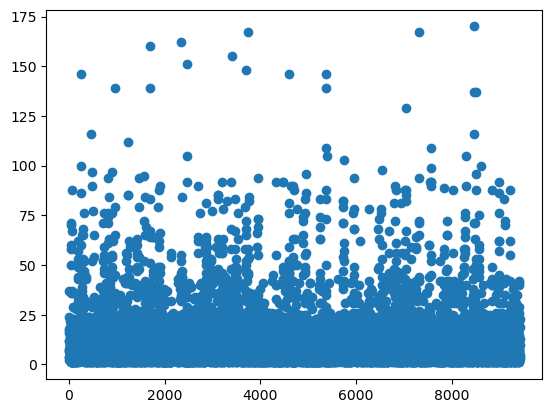

In [48]:

# Univariate analysis
#Univariate anlysis is a quantative method of data analysis that involves studing and interpreting a single 
#variable without considering its relationships with other variable.

plt.scatter(df.index,df['Quantity ordered new'])
plt.show()

# Bivariate analysis
#Bivarieate is one of the simplest forms of quantative analysis. 








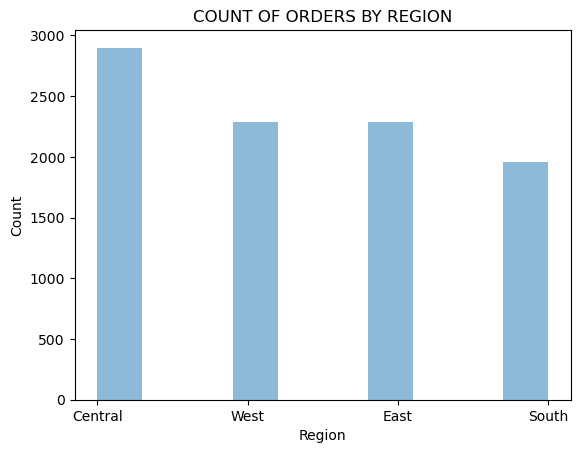

In [70]:
plt.figure(figure=(10,6))
plt.hist(x="Region", data=df, alpha=0.5)
plt.title("COUNT OF ORDERS BY REGION")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

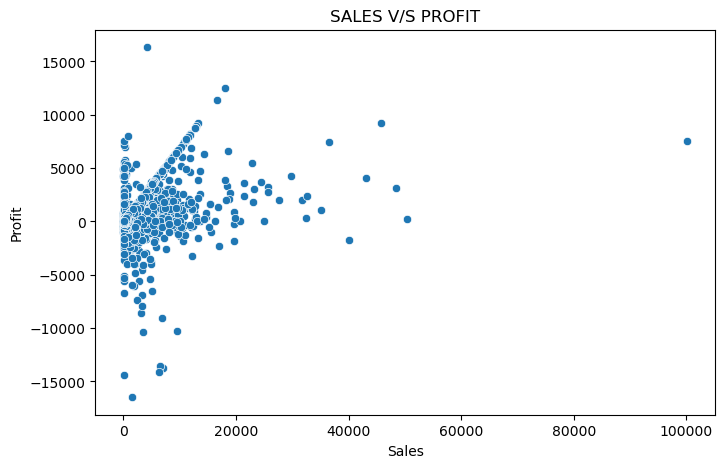

In [72]:
plt.figure(figsize= (8,5))
sns.scatterplot(data= df, x="Sales", y="Profit")
plt.title("SALES V/S PROFIT")
plt.show()

In [18]:

# Summary statistics for key variables





df.describe()



,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9354.000000,9426.000000,9426,9426,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,0.512189,52446.327286,2012-03-05 18:33:59.465308672,2012-03-07 19:16:18.485041408,139.236410,13.798430,949.706272,82318.489073
min,2.000000,0.000000,0.990000,0.490000,2.000000,0.350000,1001.000000,2010-01-01 00:00:00,2010-01-02 00:00:00,-16476.838000,1.000000,1.320000,6.000000
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,0.380000,29406.000000,2011-03-07 06:00:00,2011-03-09 00:00:00,-74.017375,5.000000,61.282500,86737.250000
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,0.520000,52302.000000,2012-04-08 00:00:00,2012-04-09 00:00:00,2.567600,10.000000,203.455000,88344.500000
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,0.590000,78516.000000,2013-03-26 00:00:00,2013-03-28 00:00:00,140.243850,17.000000,776.402500,89987.750000
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,2013-12-31 00:00:00,2014-01-17 00:00:00,16332.414000,170.000000,100119.160000,91591.000000
std,6101.890965,0.031798,281.540982,17.181203,979.167197,0.135229,29374.597802,NaN,NaN,998.486483,15.107688,2598.019818,19149.448857


In [108]:
# Grouped statistics
REGIONAL_SALES_DATA = df.groupby("Region")["Sales"].agg(["mean", "sum", "std"]).reset_index()
REGIONAL_SALES_DATA

,Region,mean,sum,std
0,Central,876.282035,2540341.62,2041.342685
1,East,1058.455518,2422804.68,2802.669839
2,South,817.475036,1597346.22,2173.877698
3,West,1047.039755,2391438.80,3258.451329



### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


In [22]:

from scipy.stats import ttest_ind, chi2_contingency

# Example: T-test for sales in different regions

Ho = "SALES ARE SAME IN DIFFERENT REGION"
Ha = "SALES ARE NOT SAME IN DIFFERENT REGION"

x= np.array(df[df.Sales == 'yes'].Region) 
y= np.array(df[df.Sales == 'no'].Region) 

t, p_value = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')









SALES ARE SAME IN DIFFERENT REGION as the p_value (nan) > 0.05


In [74]:
# Example: Chi-square test for independence between Ship Mode and Customer Segment
Ho = "SHIP MODE NOT INDEPENDECE TO CUSTOMER SEGMENT"
Ha = "SHIP MODE AN INDEPENDECE TO CUSTOMER SEGMENT"

crosstab = pd.crosstab(df['Ship Mode'],df['Customer Segment'])

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

SHIP MODE NOT INDEPENDECE TO CUSTOMER SEGMENT as the p_value (0.949) > 0.05


Customer Segment,Consumer,Corporate,Home Office,Small Business
Ship Mode,,,,
Delivery Truck,263,465,299,256
Express Air,222,398,267,220
Regular Air,1409,2512,1750,1365


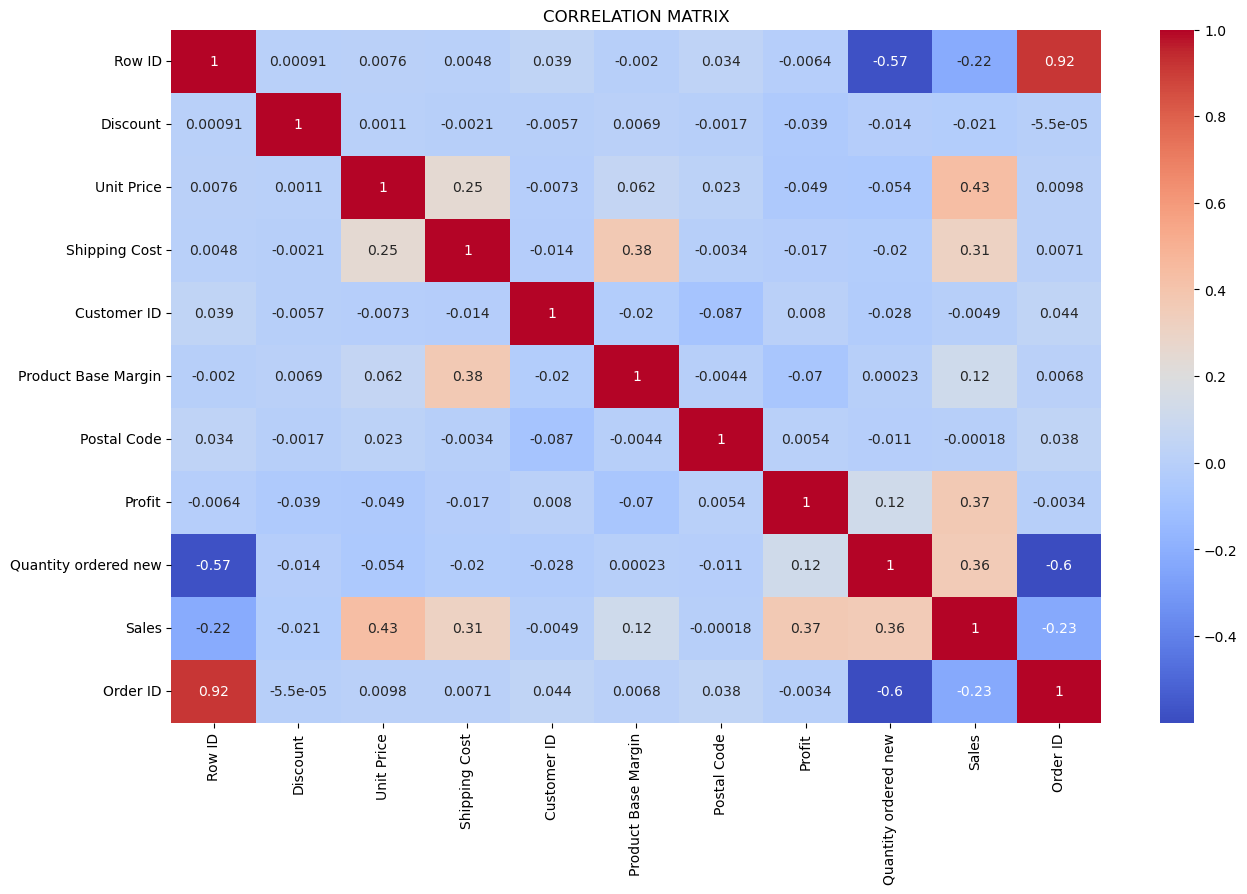

In [112]:
# Selecting only numeric columns for correlation matrix


plt.figure(figsize= (15,9))
output_correlation=df.corr(numeric_only= True)
plt.title("CORRELATION MATRIX")
sns.heatmap(output_correlation, annot= True, cmap= "coolwarm")
plt.show()






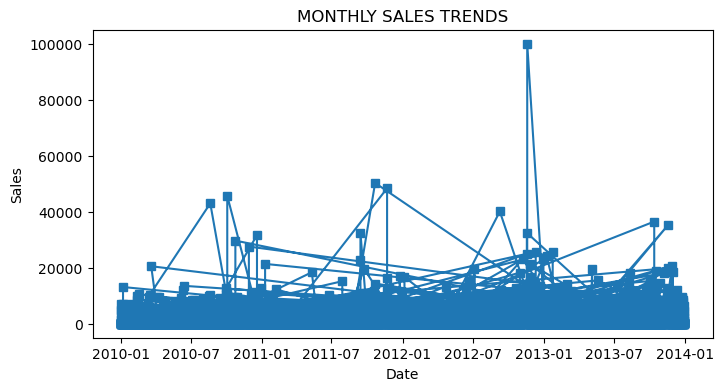

In [52]:

# Plotting sales trends over time



# Resample sales data by month

plt.figure(figsize=(8, 4))
plt.title('MONTHLY SALES TRENDS')
plt.plot(df["Order Date"], df["Sales"],marker='s')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()






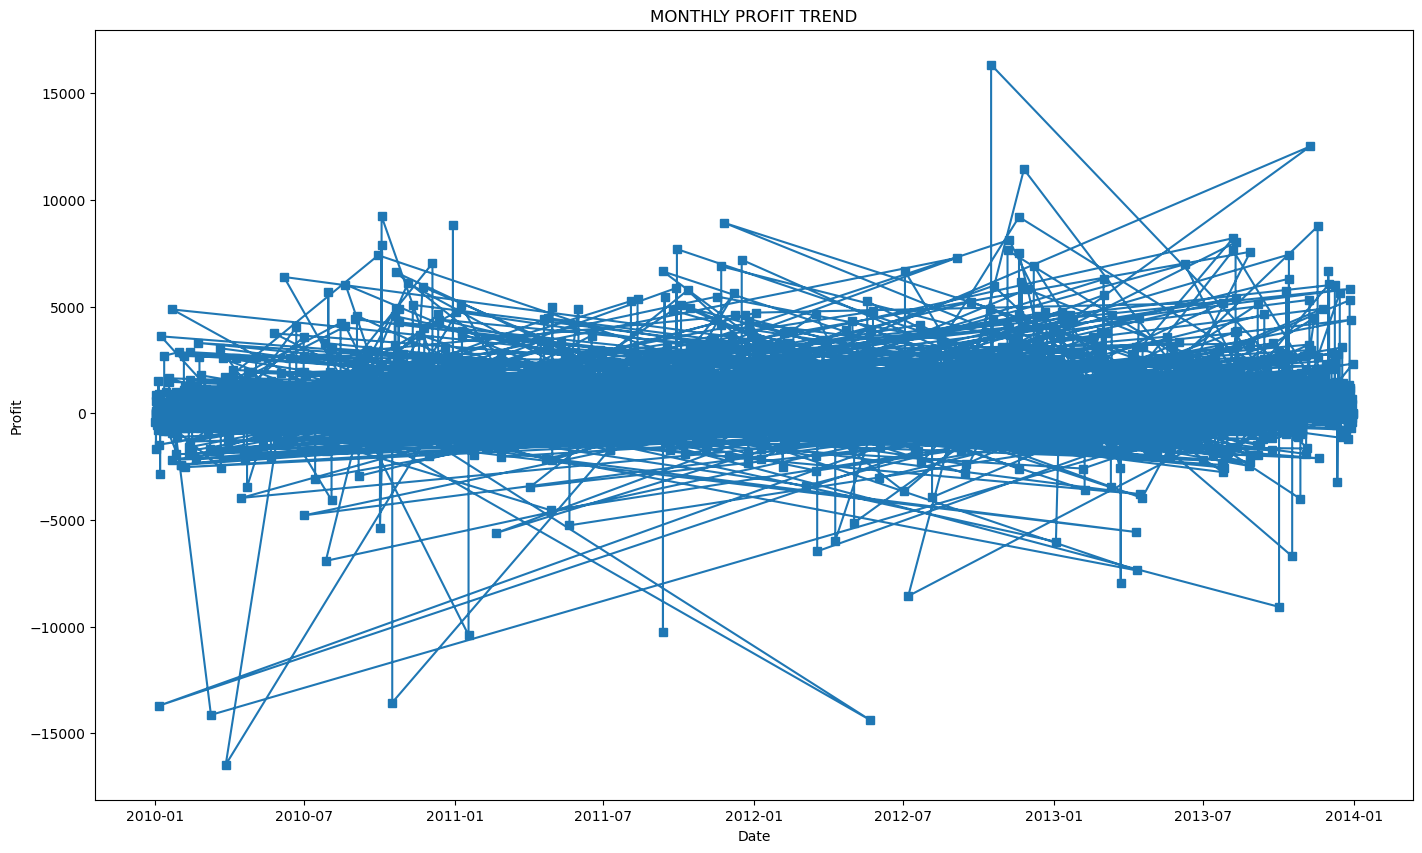

In [60]:

# Plotting profit trends over time

plt.figure(figsize=(17, 10))
plt.title('MONTHLY PROFIT TREND')
plt.plot(df["Order Date"], df["Profit"],marker='s')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()






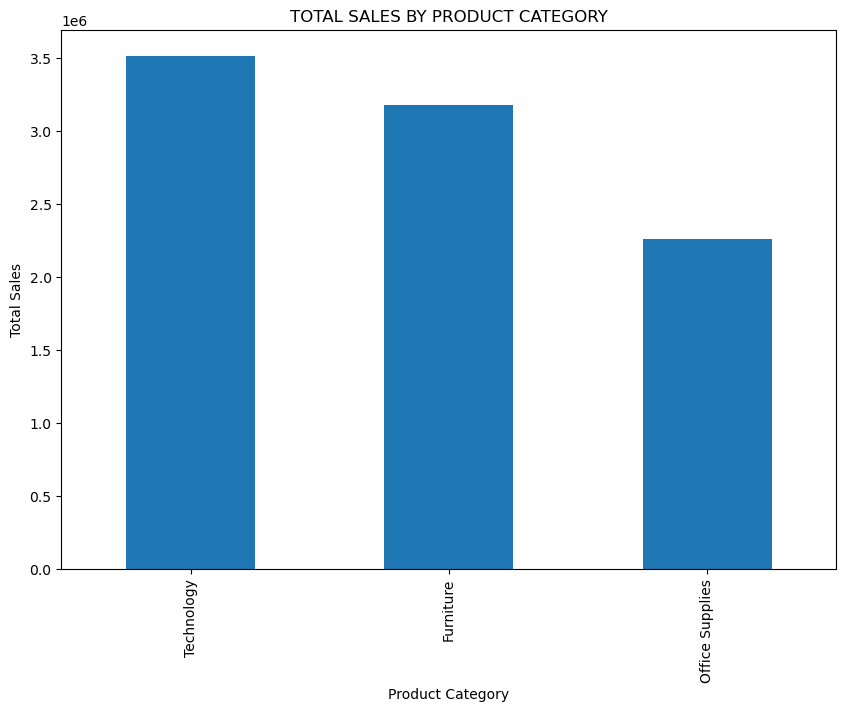

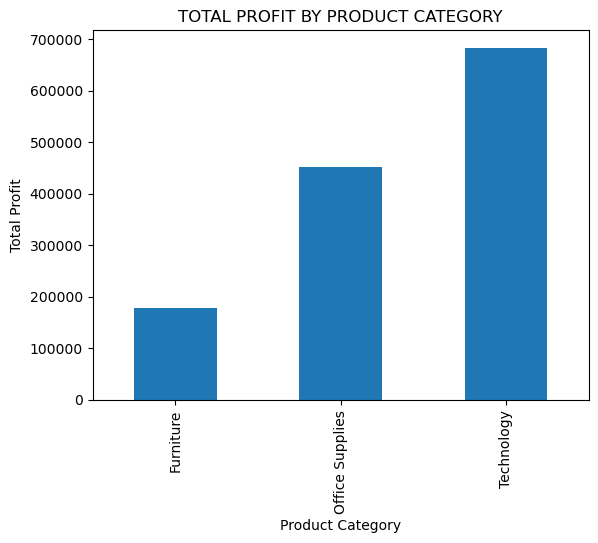

,Product Category,Sales
0,Technology,3514982.03
1,Furniture,3178623.74
2,Office Supplies,2258325.55


In [154]:

# Identifying top-performing product categories based on total sales and profit




# Plotting total sales by product category







# Plotting total profit by product category
sales_Category = df.groupby('Product Category')['Sales'].sum()
sales_Category= sales_Category.sort_values(ascending=False)

profit_Category = df.groupby('Product Category')['Profit'].sum()
sales_Category = sales_Category.sort_values(ascending=False)

plt.figure(figsize=(10,7))
plt.title('TOTAL SALES BY PRODUCT CATEGORY')
sales_Category.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()


profit_Category.plot(kind='bar')
plt.title('TOTAL PROFIT BY PRODUCT CATEGORY')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.show()

sales_Category_Table = sales_Category.reset_index()
sales_Category_Table









In [42]:

# Generating summary statistics for each region



# Display summary statistics

df.describe()


,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9354.000000,9426.000000,9426,9426,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,0.512189,52446.327286,2012-03-05 18:33:59.465308672,2012-03-07 19:16:18.485041408,139.236410,13.798430,949.706272,82318.489073
min,2.000000,0.000000,0.990000,0.490000,2.000000,0.350000,1001.000000,2010-01-01 00:00:00,2010-01-02 00:00:00,-16476.838000,1.000000,1.320000,6.000000
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,0.380000,29406.000000,2011-03-07 06:00:00,2011-03-09 00:00:00,-74.017375,5.000000,61.282500,86737.250000
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,0.520000,52302.000000,2012-04-08 00:00:00,2012-04-09 00:00:00,2.567600,10.000000,203.455000,88344.500000
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,0.590000,78516.000000,2013-03-26 00:00:00,2013-03-28 00:00:00,140.243850,17.000000,776.402500,89987.750000
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,2013-12-31 00:00:00,2014-01-17 00:00:00,16332.414000,170.000000,100119.160000,91591.000000
std,6101.890965,0.031798,281.540982,17.181203,979.167197,0.135229,29374.597802,NaN,NaN,998.486483,15.107688,2598.019818,19149.448857


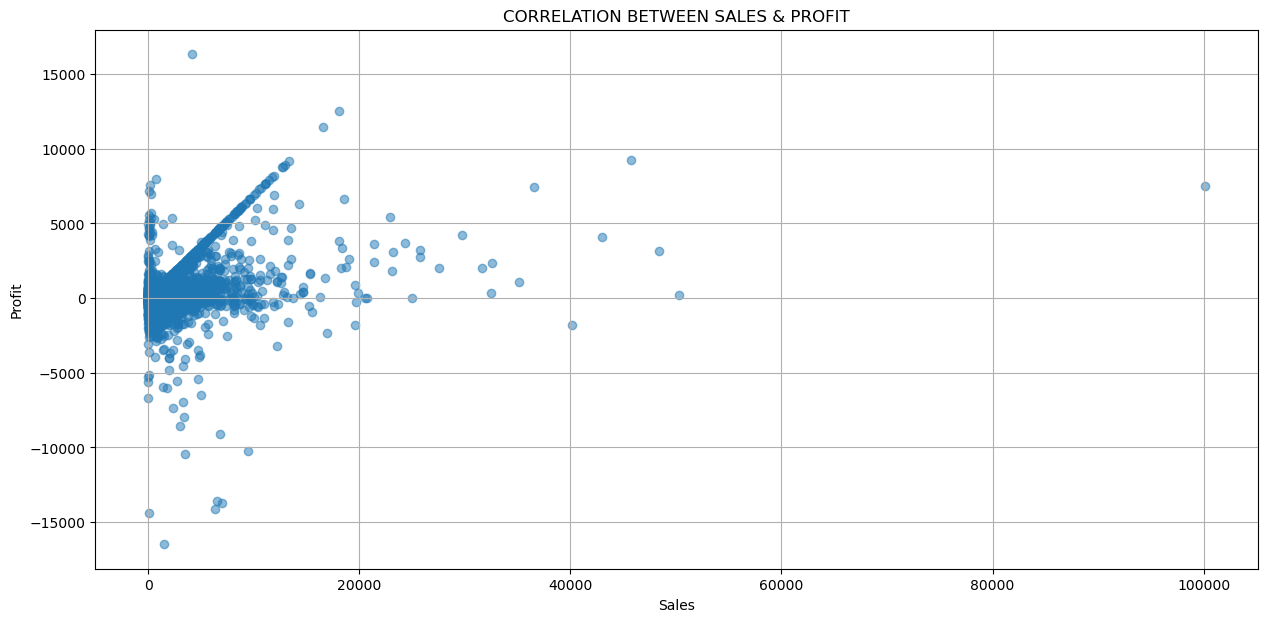

In [86]:

# Visualizing the correlation between sales and profit






# Displaying the correlation coefficient
plt.figure(figsize=(15, 7))
plt.title('CORRELATION BETWEEN SALES & PROFIT')
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.grid(True)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()






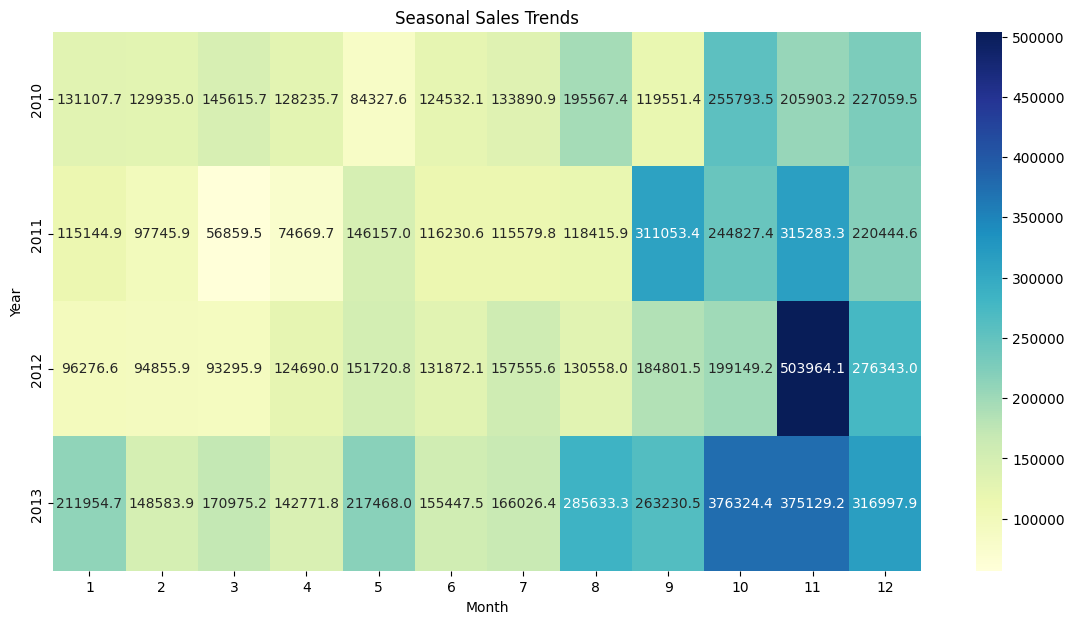

In [ ]:

# Analyzing seasonal sales trends




# Grouping sales data by month and year



# Plotting seasonal sales trends









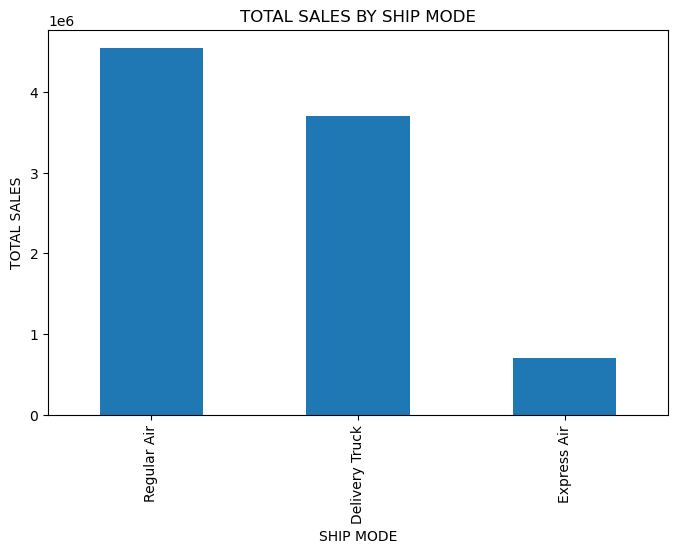

,Ship Mode,Sales
0,Regular Air,4543658.96
1,Delivery Truck,3706516.02
2,Express Air,701756.34


In [140]:

# Comparing sales across different ship modes

# Convert the Series to a DataFrame for b
# Display the table

sales_ship_mode = df.groupby('Ship Mode')['Sales'].sum()
sales_ship_mode = sales_ship_mode.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sales_ship_mode.plot(kind='bar')
plt.title('TOTAL SALES BY SHIP MODE')
plt.ylabel('TOTAL SALES')
plt.xlabel('SHIP MODE')
plt.show()

sales_ship_mode_df = sales_ship_mode.reset_index()

sales_ship_mode_df




Column Names: Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Ship Date', 'Profit', 'Quantity ordered new',
       'Sales', 'Order ID', 'Order Month', 'Order Year'],
      dtype='object')


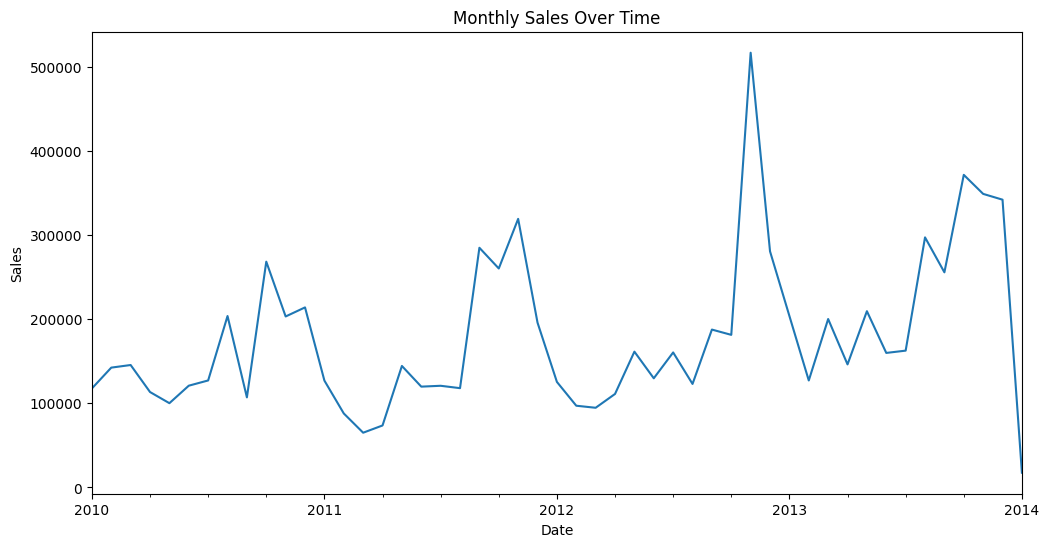

In [ ]:
# Ensure column names are clean


# Print column names to verify


# Ensure 'Ship Date' column is datetime type


# Dropping rows where 'Ship Date' couldn't be converted


# Resample sales data by month









